In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
import keras.backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from sklearn.datasets import make_multilabel_classification
# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [38]:
CATEGORIES = ['00', '01','02', '03','04','05','06','07','08','09','10']
IMG_Width = 100
IMG_height = 100

# paths for dataset
data_path = "Train/"

# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                #img_arr = cv2.imread(os.path.join(path, img)) # colorful images
                image_data.append([cv2.resize(img_arr, (IMG_Width, IMG_height)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[[169, 190, 173],
         [167, 192, 172],
         [167, 192, 174],
         ...,
         [112, 110, 104],
         [100, 100, 100],
         [ 96,  96,  94]],
 
        [[169, 189, 174],
         [171, 192, 177],
         [170, 192, 175],
         ...,
         [ 96,  97,  95],
         [ 86,  87,  86],
         [ 66,  63,  63]],
 
        [[173, 190, 176],
         [174, 190, 178],
         [171, 193, 175],
         ...,
         [ 83,  85,  82],
         [ 36,  20,  36],
         [ 26,   8,  24]],
 
        ...,
 
        [[ 47,  46,  44],
         [  3,   5,   5],
         [ 37,  31,  30],
         ...,
         [  4,   3,   3],
         [  6,   3,   3],
         [  2,   2,   2]],
 
        [[ 57,  47,  49],
         [ 37,  48,  41],
         [  8,   4,   3],
         ...,
         [  7,   3,   4],
         [  6,   3,   3],
         [  3,   3,   3]],
 
        [[ 58,  53,  49],
         [ 51,  56,  45],
         [  6,   2,   4],
         ...,
         [  4,   3,   3],
  

In [39]:
# shuffle the input data
import random
random.shuffle(image_data)

input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
input_data[:5]

[array([[[ 99, 102, 122],
         [103, 120, 145],
         [122, 131, 166],
         ...,
         [ 94,  92,  89],
         [ 87,  85,  84],
         [ 82,  82,  75]],
 
        [[ 96, 102, 124],
         [107, 114, 142],
         [114, 134, 171],
         ...,
         [ 83,  80,  80],
         [ 72,  71,  71],
         [ 51,  53,  52]],
 
        [[105, 113, 135],
         [107, 113, 133],
         [120, 134, 169],
         ...,
         [ 72,  71,  71],
         [ 31,  22,  26],
         [ 18,   7,  15]],
 
        ...,
 
        [[ 56,  57,  51],
         [ 62,  63,  56],
         [ 71,  72,  65],
         ...,
         [120, 127, 114],
         [129, 132, 116],
         [121, 123, 111]],
 
        [[ 56,  61,  56],
         [ 61,  59,  58],
         [ 72,  75,  65],
         ...,
         [ 92,  93,  92],
         [103, 105,  96],
         [129, 130, 108]],
 
        [[ 61,  63,  56],
         [ 58,  58,  54],
         [ 73,  72,  64],
         ...,
         [114, 126, 110],
  

In [40]:
label[:10]

[7, 2, 1, 4, 1, 1, 1, 0, 4, 7]

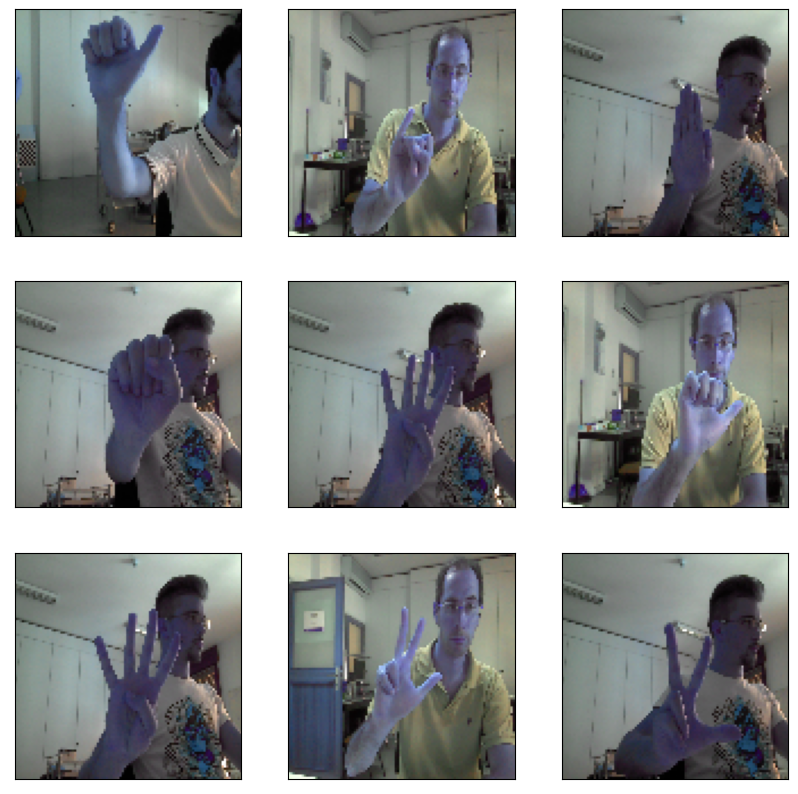

In [41]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
#plt.show()

In [42]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(14520, 100, 100, 3)

In [43]:
from sklearn.datasets import make_multilabel_classification
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [ 5., 10., 15., 28.],
       [ 0.,  8., 16., 27.],
       [ 6.,  9., 13., 22.]])

In [44]:
y

array([[0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

<function matplotlib.pyplot.show(close=None, block=None)>

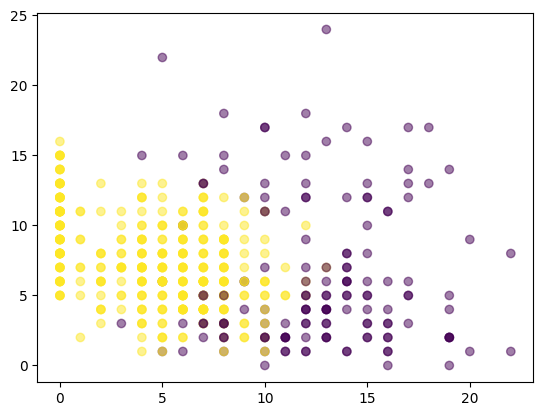

In [45]:
rng=np.random.RandomState(1)
colors=rng.rand(1000)
plt.scatter(X[:,0:1],X[:,1:2],c=y[:,0],alpha=0.5,cmap='viridis')
plt.show

In [46]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

In [47]:
label = keras.utils.to_categorical(label, num_classes=11,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int8)

In [50]:
# reshaping the data
input_data.shape = (-1, IMG_Width, IMG_height, 1)

In [51]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.10, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

ValueError: Found input variables with inconsistent numbers of samples: [43560, 14520]

In [52]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 256, kernel_size = (2,2), input_shape = (IMG_Width, IMG_height, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (2,2)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (2,2)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
         optimizer = 'rmsprop',
         metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

print("Train accuracy:", history.history['accuracy'][-1])
print("Val accuracy:", history.history['val_accuracy'][-1])

print("Train loss:", history.history['loss'][-1])
print("Val loss:", history.history['val_loss'][-1])

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 99, 99, 256)       1280      
                                                                 
 activation_17 (Activation)  (None, 99, 99, 256)       0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 49, 49, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 48, 48, 128)       131200    
                                                                 
 activation_18 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 24, 24, 128)      0         
 g2D)                                                 